In [6]:
using FFTW
using Plots
using WAV

In [7]:
dt = 0.001
start = 0
stop = 1
t = LinRange(start, stop, Int((stop - start)/dt))
f = sin.(2π * 50t) + sin.(2π * 120t)
f_clean = f
f_noisy = f + 2.5 * randn(length(t))

1000-element Array{Float64,1}:
  2.299020037326906
 -1.0128049204249763
  0.06122622661374244
  3.6110278262243236
  1.2424733609721417
  2.5063426260791726
  1.693331380191967
  0.6883178788471084
 -0.1656112737027009
  1.6580903224365482
  2.9789293296036883
 11.890949973164604
  1.1306840972678542
  ⋮
 -2.3263971497012728
  1.9029598236198255
 -3.0684991634737817
 -4.1461746610290104
 -1.8965479626605035
 -2.575820694795541
  3.4859709444537677
 -0.9871312861536997
 -3.3793211197368134
 -2.4391733495126835
 -1.729444779821967
  1.837427008161071

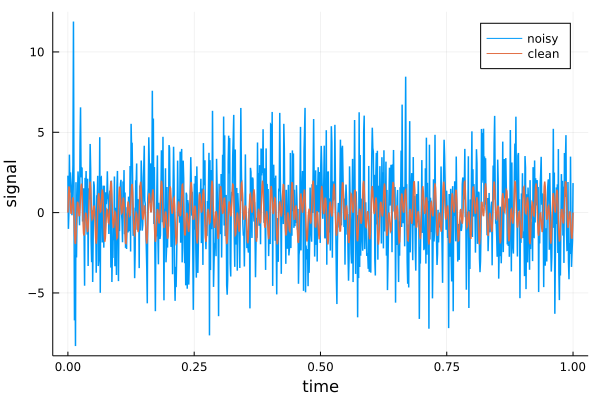

In [8]:
plot(t, f_noisy, linewidth = 1.5, label = "noisy", xlabel = "time", ylabel = "signal")
plot!(t, f_clean, linewidth = 1.5, label = "clean")

In [9]:
n = length(t)
fhat = fft(f_noisy)
PSD = real(fhat .* conj(fhat)/n) #power spectral density
freq = 1/(dt * n) * [i for i in 1:n]
L = [i for i in 1:Int(n/2)] #bierzemy połowę

500-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 489
 490
 491
 492
 493
 494
 495
 496
 497
 498
 499
 500

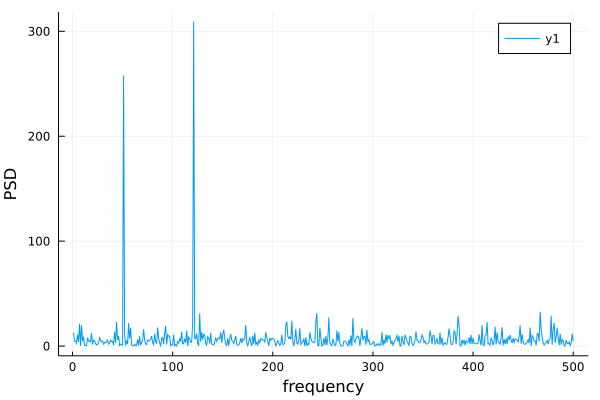

In [10]:
plot(freq[L], PSD[L], xlabel = "frequency", ylabel = "PSD")

In [11]:
indices = [i > 100 for i in PSD]
PSD_clean = indices .* PSD
fhat_clean = indices .* fhat
filtered = ifft(fhat_clean)
filtered_fft = fft(filtered)

1000-element Array{Complex{Float64},1}:
   2.398081733190338e-14 + 1.5777218104420236e-30im
  -1.204429577219074e-31 - 4.376710473039888e-31im
  -2.317133039647575e-16 + 8.402654693124589e-16im
    5.46866013060468e-31 + 1.2921951959232912e-31im
 -1.2924616479658497e-31 - 2.1583465413361167e-31im
   7.630214723565237e-15 + 4.449332725324913e-15im
  1.4673984585858351e-15 - 1.0963175158402628e-15im
  3.8362813214916876e-31 + 4.271176216338309e-31im
                     0.0 + 0.0im
  -6.121381103668198e-31 - 1.845047924722281e-31im
 -1.0658141036401503e-14 - 4.440892098500626e-15im
  2.0725030416002258e-32 - 1.5524334296287261e-30im
   7.381016736557305e-32 + 5.629337291465967e-31im
                         ⋮
 -7.6818203061781545e-31 + 9.661425537432163e-32im
   6.630341535413775e-31 - 3.9781815465821194e-32im
 -1.0586705158065576e-14 - 9.181378415515606e-15im
 -1.6674080084378214e-31 - 4.386721676521769e-31im
                     0.0 + 0.0im
   4.107123434882564e-31 + 5.8593037999655575

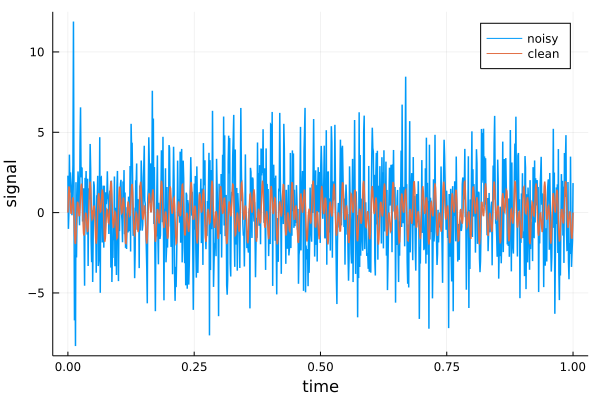

In [12]:
plot(t, f_noisy, linewidth = 1.5, label = "noisy", xlabel = "time", ylabel = "signal")
plot!(t, f_clean, linewidth = 1.5, label = "clean")

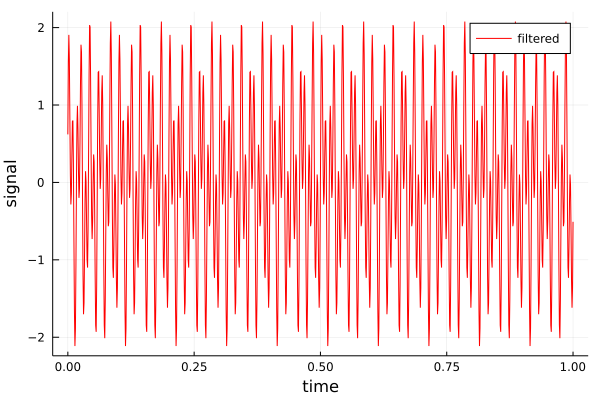

In [13]:
plot(t, real(filtered), color = :red, label = "filtered", xlabel = "time", ylabel = "signal")

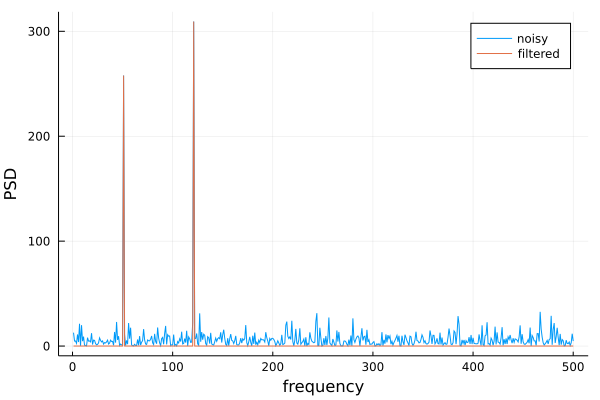

In [14]:
plot(freq[L], PSD[L], label = "noisy", xlabel = "frequency", ylabel = "PSD")
plot!(freq[L], PSD_clean[L], label = "filtered")

### Funkcja wycinająca określoną częstotliwość

In [43]:
function remove_frequency(sound, freq_to_remove, dt = 0.001, start = 0, stop = 220.5)
    t = LinRange(start, stop, Int((stop - start)/dt))
    n = length(t) 
    fhat = real.(fft(sound[1][:, 1])) 
    PSD = fhat .* conj(fhat)/n 
    freq = 1/(dt * n) .* [i for i in 1:n] 
    
    indices = [i*dt*n != freq_to_remove for i in freq] 
    PSD_clean = indices .* PSD 
    fhat_clean = indices .* fhat 
    real(ifft(fhat_clean)), freq, PSD_clean, fhat_clean
end

remove_frequency (generic function with 4 methods)

In [44]:
wavplay("440Hz.wav")

In [45]:
sound = wavread("440Hz.wav") 

([0.0; 0.04336680196539201; … ; -0.08655049287392803; -0.043336283455916016], 44100.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x01, 0x00, 0x44, 0xac, 0x00, 0x00, 0x88, 0x58, 0x01, 0x00, 0x02, 0x00, 0x10, 0x00]), WAVChunk(:_PMX, UInt8[0x3c, 0x3f, 0x78, 0x70, 0x61, 0x63, 0x6b, 0x65, 0x74, 0x20  …  0x20, 0x65, 0x6e, 0x64, 0x3d, 0x22, 0x77, 0x22, 0x3f, 0x3e]), WAVChunk(:DISP, UInt8[0x01, 0x00, 0x00, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x43, 0x52, 0x44, 0x00, 0x00  …  0x00, 0x00, 0x49, 0x53, 0x46, 0x54, 0x00, 0x00, 0x00, 0x00])])

In [46]:
fhat2 = real.(fft(sound[1][:, 1]))
PSD2 = fhat2 .* conj(fhat2)/220500
PSD2[440]

4.4753497090397926e-12

In [47]:
PSD2[200]

2.4301167503839414e-10

In [48]:
filtered, freq, PSD, fhat = remove_frequency(sound, 440)

([4.5051493459409545e-9, 1.5263759534800274e-5, -1.5254750998633366e-5, 4.501977240766303e-9, 1.5263754248631596e-5, -1.5254758398110806e-5, 4.492465500231263e-9, 1.5263742626146906e-5, 1.526373734648851e-5, 4.476627449678931e-9  …  4.469945986472796e-9, 4.476627449676665e-9, 1.5263737346488506e-5, 1.5263742626146913e-5, 4.492465500228242e-9, -1.5254758398110813e-5, 1.5263754248631596e-5, 4.501977240765297e-9, -1.5254750998633366e-5, 1.5263759534800274e-5], [0.0045351473922902496, 0.009070294784580499, 0.01360544217687075, 0.018140589569160998, 0.022675736961451247, 0.0272108843537415, 0.031746031746031744, 0.036281179138321996, 0.04081632653061225, 0.045351473922902494  …  999.9591836734694, 999.9637188208617, 999.968253968254, 999.9727891156463, 999.9773242630386, 999.9818594104308, 999.9863945578231, 999.9909297052154, 999.9954648526077, 1000.0], [3.576877130110187e-10, 9.25719061478678e-11, 3.3721623069578293e-10, 1.227561068776742e-11, 1.3905676776454012e-10, 2.7060451421995146e-1

In [49]:
PSD[440]

0.0

In [50]:
PSD[200]

2.4301167503839414e-10

In [51]:
wavplay(real.(fft(filtered)), sound[2]) #to było tak, ale to nie ma sensu

In [52]:
wavplay(filtered, sound[2]) # to ma więcej sensu, ale nic nie słychać, chociaż w sumie może tak ma być

## Zmiana głośności

In [27]:
sound = wavread("440Hz.wav")

([0.0; 0.04336680196539201; … ; -0.08655049287392803; -0.043336283455916016], 44100.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x01, 0x00, 0x44, 0xac, 0x00, 0x00, 0x88, 0x58, 0x01, 0x00, 0x02, 0x00, 0x10, 0x00]), WAVChunk(:_PMX, UInt8[0x3c, 0x3f, 0x78, 0x70, 0x61, 0x63, 0x6b, 0x65, 0x74, 0x20  …  0x20, 0x65, 0x6e, 0x64, 0x3d, 0x22, 0x77, 0x22, 0x3f, 0x3e]), WAVChunk(:DISP, UInt8[0x01, 0x00, 0x00, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x43, 0x52, 0x44, 0x00, 0x00  …  0x00, 0x00, 0x49, 0x53, 0x46, 0x54, 0x00, 0x00, 0x00, 0x00])])

In [28]:
sound_fft = 0.1 .* fft(sound[1][:, 1])

220500-element Array{Complex{Float64},1}:
   0.0008880886257515611 + 0.0im
  0.00045179757973682033 - 0.0005182289078453506im
   0.0008623002891592936 - 3.930343627408703e-5im
 -0.00016452270836126898 - 0.00024972320842437876im
   0.0005537329436838764 + 0.0007132458432075757im
  0.00024427094666680955 + 0.00038790264372158957im
  -0.0005167878520734129 + 0.00028078167558959297im
   -0.000531553619659157 + 5.643995005875989e-5im
  -0.0002014515562791308 + 0.0006620109997562518im
   0.0008177381841365074 - 0.00016819058921108671im
  -0.0009898877743209186 - 0.0004036351735071591im
    0.001170735818344489 + 1.2618482050944045e-5im
   0.0005507976795802299 + 0.00013112791770889193im
                         ⋮
   0.0005507976795767733 - 0.00013112791771086353im
   0.0011707358183444887 - 1.2618482050944089e-5im
  -0.0009898877743209189 + 0.000403635173507159im
   0.0008177381841468186 + 0.00016819058920603265im
 -0.00020145155627913087 - 0.0006620109997562518im
  -0.0005315536196591569 - 

In [29]:
sound_ifft = real.(ifft(sound_fft))

220500-element Array{Float64,1}:
  7.398969318306882e-19
  0.004336680196539199
  0.008651997436445203
  0.01293374431592761
  0.01716666158024843
  0.021329386272774448
  0.025412762840662854
  0.029395428327280496
  0.03326212347788934
  0.036994537186803796
  0.040586565752128684
  0.044016846217230746
  0.04727317117831964
  ⋮
 -0.04727317117831967
 -0.044016846217230766
 -0.04058656575212868
 -0.036994537186803796
 -0.03325907162694176
 -0.02939237647633291
 -0.025412762840662864
 -0.021332438123722017
 -0.017163609729300828
 -0.01293374431592762
 -0.008655049287392778
 -0.004333628345591609

In [30]:
wavplay(sound_ifft, sound[2])

In [31]:
wavplay("440Hz.wav")